In [1]:
import pandas as pd 
import os 

base_dir = '/Volumes/KESU/BNP_Paribas_Cardif_Claims_Management'
data = os.path.join(base_dir, './dataset')
dataset = pd.read_csv(os.path.join(data, 'train.csv') )
dataset.shape

(114321, 133)

In [2]:
dataset.head()

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,...,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,...,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,...,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,...,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN


In [3]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(dataset.select_dtypes(numerics).columns)
dataset = dataset[numerical_vars]
dataset.shape

(114321, 114)

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataset.drop(labels=['ID', 'target'],axis=1), dataset['target'],
                                                                                        random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((85740, 112), (28581, 112), (85740,), (28581,))

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

roc_values = []
for feature in X_train.columns:
    clf = DecisionTreeClassifier()
    clf.fit(X_train[feature].fillna(0).to_frame(), y_train)
    y_scored = clf.predict_proba(X_test[feature].fillna(0).to_frame())
    roc_values.append(roc_auc_score(y_test, y_scored[:, 1]))

In [7]:
roc_values = pd.Series(roc_values)
roc_values.index = X_train.columns
roc_values.sort_values(ascending=False)

v50     0.630104
v10     0.629977
v14     0.579436
v129    0.577960
v62     0.571546
v72     0.544426
v12     0.540780
v59     0.528756
v44     0.526364
v48     0.525829
v21     0.525038
v42     0.523823
v68     0.523562
v45     0.523175
v63     0.523085
v2      0.522955
v67     0.521971
v106    0.521888
v54     0.521842
v89     0.521808
v58     0.521550
v11     0.521095
v101    0.520662
v61     0.520454
v100    0.520152
v64     0.519718
v128    0.519542
v78     0.519491
v127    0.519477
v20     0.519339
          ...   
v73     0.512799
v5      0.512668
v99     0.512646
v81     0.512639
v34     0.512451
v93     0.512391
v84     0.512187
v9      0.512115
v120    0.512044
v122    0.512026
v40     0.511642
v105    0.511604
v97     0.510914
v32     0.510875
v115    0.509180
v16     0.508712
v37     0.508531
v18     0.508027
v28     0.507960
v43     0.507705
v1      0.507581
v119    0.506466
v102    0.505617
v8      0.504509
v80     0.503418
v69     0.503355
v131    0.503344
v82     0.5016

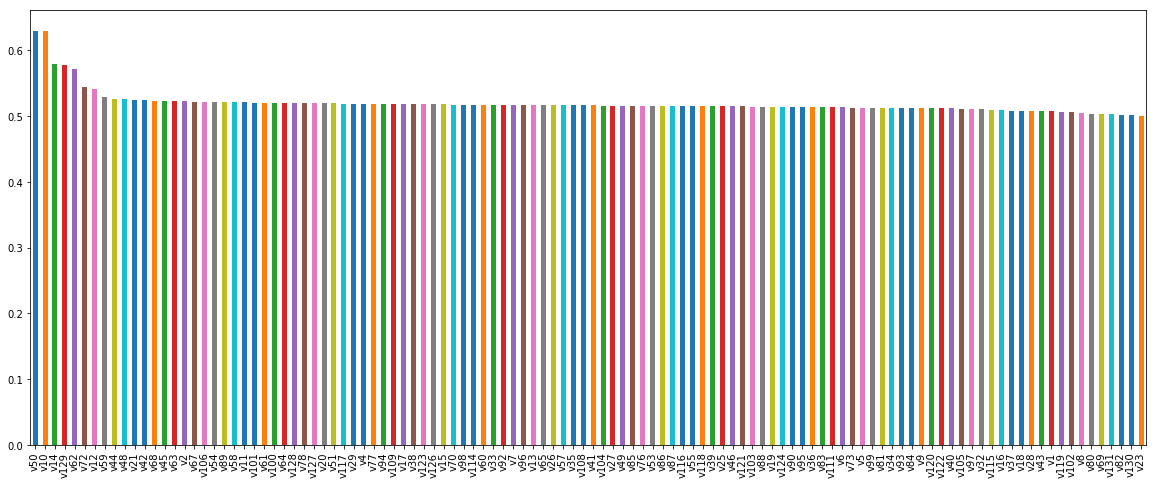

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

roc_values.sort_values(ascending=False).plot.bar(figsize=(20,8))

In [12]:
len(roc_values[roc_values > 0.5])

111